# IMPLEMENTATION DE L'ACP HERMAN

In [1]:
#importation des librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
datax = np.matrix('-2,3,-1  ; -1,1,0 ;2,-1,-1; 1 ,-3,2' )

In [3]:
data = np.matrix('2,1  ; 6,6 ;5,3 ;3 ,3  ; 3,5 ; 1 ,2 ' )
data
np.dot(data , np.transpose(data))

matrix([[ 5, 18, 13,  9, 11,  4],
        [18, 72, 48, 36, 48, 18],
        [13, 48, 34, 24, 30, 11],
        [ 9, 36, 24, 18, 24,  9],
        [11, 48, 30, 24, 34, 13],
        [ 4, 18, 11,  9, 13,  5]])

In [4]:
x = pd.DataFrame(datax)


In [5]:
#cette fonction permet de centrer et reduire une variable

def scoreb(X):
    new = X - np.mean(X ,axis = 0)
    return new/ np.std(new , axis = 0)


In [6]:
#calcul de la moyenne

def mean(column):
    s = 0
    for i in range(len(column)):
        s = s+ column[i]
    return s/len(column)

In [7]:
#calcul de la variance

def variance(col):
    s = 0
    for i in range(len(col)):
        s= s + math.pow(col[i] , 2)
    p = s/len(col)
    return p- math.pow(mean(col) , 2)
    

In [8]:
#cette fonction permet de centrer et reduire une variable

def score(col):
    xbar = mean(col)
    print(xbar)
    sigma = math.sqrt(variance(col))
    for i in range(len(col)):
        col[i] = (col[i] -xbar)/sigma
    return col


In [11]:
# cette fonction permet de calculer la matrice   des covariances variances 

def covariance_matrice( m ):
    ponderation = float(1 / len(m)) # je recupere le facteur de ponderation
    p = np.dot(np.transpose(m) , m)
    return ponderation * p

In [12]:
#calcul la covariance entre 2 variables

def covariance(x,y):
    summ = 0
    if(len(x) != len(y)):
        raise ValueError(" x et y doivent avoir la meme taille")
        
    n = len(x)
    for i in range(n):
        summ = summ + (x[i]* y[i]) 
    s = float(summ/n)
    corr = s - (mean(x)* mean(y))
    return corr

In [13]:
#calcul de la correlatiob entre 2 variables

def pearson(x,y):
    if(len(x) != len(y)):
        raise ValueError(" x et y doivent avoir la meme taille")
    sigmaX = math.sqrt(variance(x))
    sigmaY = math.sqrt(variance(y))
    return covariance(x,y)/(sigmaX *sigmaY)
    

In [14]:
def visualise_corr(data ,X , dim):
    if dim==2 :
        x,y = splitData(data ,2)
        theta = np.linspace(0,2* np.pi , 360)
        radius = 1
        a = radius  *  np.cos(theta)
        b = radius * np.sin(theta)
    
    
        figure , axes = plt.subplots(figsize=(12,12))
        axes.plot(a,b)
        plt.scatter(x,y)
        plt.vlines(x = 0 ,ymin = -1 ,ymax = 1)
        plt.hlines(y = 0 ,xmin = -1 ,xmax = 1)
        for i in range((X.shape)[1]):
            plt.text(x[i] , y[i]," I {}".format(X.columns[i]))
        plt.scatter(x ,y  ,c="#8a2be2")
        plt.show()
    elif dim == 3 :
        x,y,z = splitData(data  , 3)
        fig = plt.figure(figsize = (10 ,7))
        axes = plt.axes(projection = '3d')
        axes.scatter3D(x,y,z , color = "red")
        axes.set_xlabel("composante 1")
        axes.set_ylabel("composante 2")
        axes.set_zlabel("composante 3")
        plt.show()
    


In [15]:
def visualise_1(data , dimension):
            
    if dimension ==2 :
        x = data[0].tolist()
        y = data[1].tolist()
        pc = pd.DataFrame(x)
        px  = pd.DataFrame(y)
        p = pd.concat([pc,px ], axis  =1 , join = "inner")
        p.columns=[ "PCA 1" , "PCA 2"]
        print(p)
        
        for i in range(len(x)):
            plt.text(x[i] , y[i]," I {}".format(i))
        plt.figure(1,figsize=(19,19))
        plt.scatter(x ,y  ,c="#8a2be2")
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.show()
    else : 
        x = data[0].tolist()
        y = data[1].tolist()
        z = data[2].tolist()
        pc = pd.DataFrame(x)
        px  = pd.DataFrame(y)
        pz  = pd.DataFrame(z)
        p = pd.concat([pc,px,pz ], axis  =1 , join = "inner")
        p.columns=[ "PCA 1" , "PCA 2" , "PCA 3"]
        print(p)


In [16]:
def splitData(data , dim):
    x = []
    y = []
    z = []
    if dim == 2:
        for i in range(len(data)):
            x.append(data[i][0])
            y.append(data[i][1])
        return x ,y
    else : 
        for i in range(len(data)):
            x.append(data[i][0])
            y.append(data[i][1])
            z.append(data[i][2])
        return x ,y ,z
        
    

In [17]:
def acp (X ,  s):
    matrice_Ini  = X
    
    if(matrice_Ini.shape[1]==1 and matrice_Ini.shape[0] ==1):
        raise ValueError("la matrice doit etre de taille different de (1 , 1)")
    print("la matrice initiale est :")

    print(X)
    m_c_r = scoreb(X)
    print("la matrice centree reduite est : ")
    print(m_c_r)
    
    m_c = covariance_matrice(m_c_r)
    
    print(" LA matrice des Variances Covariances ")
    print(m_c)
    val_p , Mat_vect = np.linalg.eig(m_c)
    
    print("\t\t Les valeurs propres sont : \n")
    print(val_p)
    
    print("\t\t La matrice associées aux  vecteurs propres sont : \n")
    print(Mat_vect)
    
    #on tri les valeurs propres
    ind = val_p.argsort()[::-1]
    val_p = val_p[ind]
    Mat_vect = Mat_vect[:,ind]
    
    # on verifit le taux de conservation
    if(s >4 or s <= 0):
        raise ValueError(" erreur s  est compris entre 1 et 3 ")
    
    taux_inertie = 0
    b= 0

    for i in range(0,s):
        taux_inertie = val_p[i]+taux_inertie
        b = taux_inertie/sum(val_p)
    
    print("\n Le taux de conservation des données est de {} % \n".format(b*100))
    
    A = []
    #on verifit les differentes  valeur de s
    if(s == 1):
        print(" S = {} AJustement par une droite".format(s))
        A.append(np.dot(m_c_r , Mat_vect[:,0]))
        print(" LA composante principale pour lambda max est  :")
        print(pd.DataFrame(A[0]))
    
    elif(s==2 ):
        
        print("Ajustement des nuages des individus dans la plan")
        #calcul des composantes principales
        composante=[]
        for i in range(0,s):
            composante.append(np.dot(m_c_r,Mat_vect[:,i]))
            
          #calcul des nouveaux individus  
        data_cor = [] 
        for i in range(m_c_r.shape[1]):
            pt  = list()
            for k in range(0,s):
                pt.append(pearson(m_c_r[m_c_r.columns[i]] ,composante[k]))
            data_cor.append(pt)

            
        #visualisation du plan factoriel
        visualise_1(composante , s)
        
        #visualisation des individus dans le nouveau plan factoriel
        a = pd.DataFrame(data_cor)
        a.columns = ["R(MCT(i) ,PCA1)" ,"R(MCT(i) ,PCA2)"]
        print("Matrice des correlations entre les indiviudes et les composantes principales")
        print(a)
        visualise_corr(data_cor ,X ,2)
        
    elif(s== 3):
        print("Ajustement du nuage des individus dans l'espace a 3 dimensions")
        #calcul des composantes principales
        composante=[]
        for i in range(0,s):
            composante.append(np.dot(m_c_r,Mat_vect[:,i]))
        
        print("Représentation des Composantes Principales")
        visualise_1(composante , s)

        print()
          #calcul des nouveaux individus  
        data_cor = [] 
        for i in range(m_c_r.shape[1]):
            pt  = list()
            for k in range(0,s):
                pt.append(pearson(m_c_r[m_c_r.columns[i]] ,composante[k]))
            data_cor.append(pt)
        
        visualise_corr(data_cor ,X ,3)
       # print(pd.DataFrame(data_cor))

    else :
        print(" s = {} donc on a une conservationn de tableau initiale" .format(s))
        print(X)
    
    #Representation des individus dans l'espace initial
    

Bienvenue sur la simulation de l ACP
entrer le nombre de ligne5
entrer le nombre de colonne3
Entrer l'element à la position [1,1]2
Entrer l'element à la position [1,2]2
Entrer l'element à la position [1,3]3
Entrer l'element à la position [2,1]3
Entrer l'element à la position [2,2]1
Entrer l'element à la position [2,3]2
Entrer l'element à la position [3,1]1
Entrer l'element à la position [3,2]0
Entrer l'element à la position [3,3]3
Entrer l'element à la position [4,1]2
Entrer l'element à la position [4,2]1
Entrer l'element à la position [4,3]4
Entrer l'element à la position [5,1]2
Entrer l'element à la position [5,2]1
Entrer l'element à la position [5,3]3
Entrer le taux de conservation des données
None2
2.0 2.0 3.0 
3.0 1.0 2.0 
1.0 0.0 3.0 
2.0 1.0 4.0 
2.0 1.0 3.0 
la matrice initiale est :
     0    1    2
0  2.0  2.0  3.0
1  3.0  1.0  2.0
2  1.0  0.0  3.0
3  2.0  1.0  4.0
4  2.0  1.0  3.0
la matrice centree reduite est : 
          0         1         2
0  0.000000  1.581139  0.0000

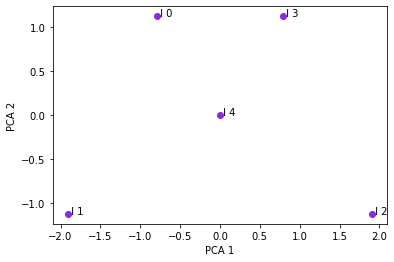

Matrice des correlations entre les indiviudes et les composantes principales
   R(MCT(i) ,PCA1)  R(MCT(i) ,PCA2)
0        -0.923880    -4.440892e-17
1        -0.653281     7.071068e-01
2         0.653281     7.071068e-01


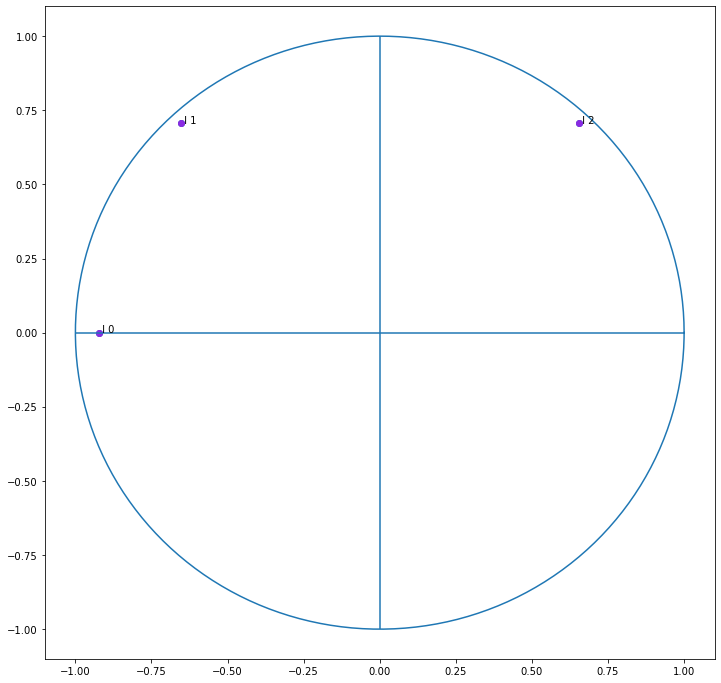

In [20]:
def takeInputUser():
    print("Bienvenue sur la simulation de l ACP")
    nbLigne = int(input("entrer le nombre de ligne"))
    nbColonne = int(input("entrer le nombre de colonne"))
    mat = []
    len(mat)
    for i in range(0,nbLigne):
        a = []
        for j in range(0, nbColonne):
            a.append(float(input("Entrer l'element à la position [{i},{j}]".format(i = i+1 , j=j+1))))
        mat.append(a)
    taux = 0
    try:
        taux= int(input(print("Entrer le taux de conservation des données" )))
    except:
        print("la valeur doit etre positive ou etre un nombre")
    
    for i in range(0,nbLigne):
        for j in range(0, nbColonne):
            print(mat[i][j], end=" ")
        print()
    p=pd.DataFrame(mat)
    acp(p,taux)
takeInputUser()

la matrice initiale est :
   0  1  2
0 -2  3 -1
1 -1  1  0
2  2 -1 -1
3  1 -3  2
la matrice centree reduite est : 
          0         1         2
0 -1.264911  1.341641 -0.816497
1 -0.632456  0.447214  0.000000
2  1.264911 -0.447214 -0.816497
3  0.632456 -1.341641  1.632993
 LA matrice des Variances Covariances 
[[ 1.         -0.84852814  0.25819889]
 [-0.84852814  1.         -0.73029674]
 [ 0.25819889 -0.73029674  1.        ]]
		 Les valeurs propres sont : 

[2.25498344e+00 7.45016556e-01 1.01041396e-16]
		 La matrice associées aux  vecteurs propres sont : 

[[-0.5531024   0.64521311  0.52704628]
 [ 0.66556564 -0.03829921  0.74535599]
 [-0.50109891 -0.76304208  0.40824829]]

 Le taux de conservation des données est de 100.0 % 

Ajustement des nuages des individus dans la plan
      PCA 1     PCA 2
0  2.001721 -0.244500
1  0.647463 -0.425197
2 -0.588130  1.456286
3 -2.061054 -0.786590


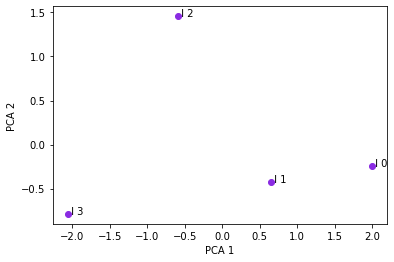

Matrice des correlations entre les indiviudes et les composantes principales
   R(MCT(i) ,PCA1)  R(MCT(i) ,PCA2)
0        -0.830572         0.556911
1         0.999453        -0.033058
2        -0.752480        -0.658615


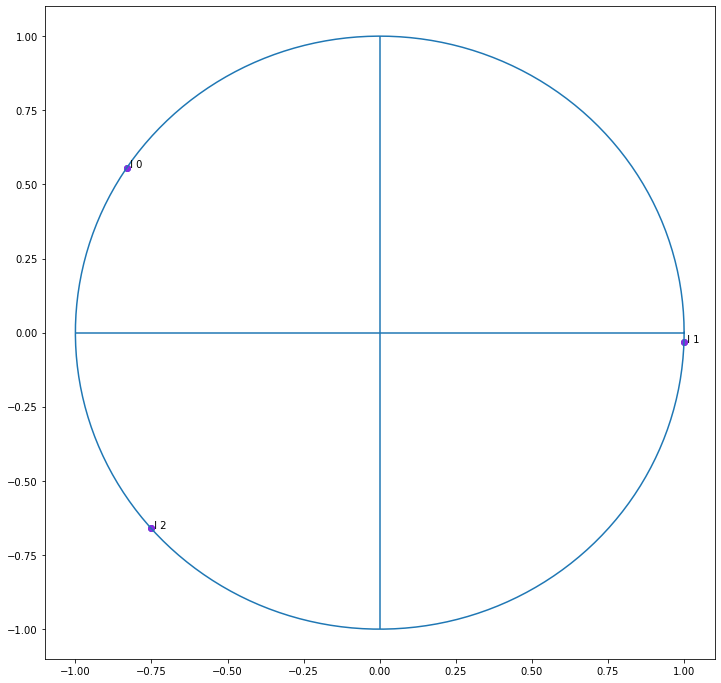

In [19]:
#d = pd.read_csv("data23.csv" ,header=None, sep = "," , names = ["Poids","age" , "notes"])
acp(x,2)